<a href="https://colab.research.google.com/github/CHANDMX20/ML/blob/main/Linear_regression_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with One Variable

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#load the dataset
data = pd.read_csv('ex1data1.csv', header=None, names=['Population', 'Profit'], skiprows=1)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [71]:
#calculating basic statistics on the dataset
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

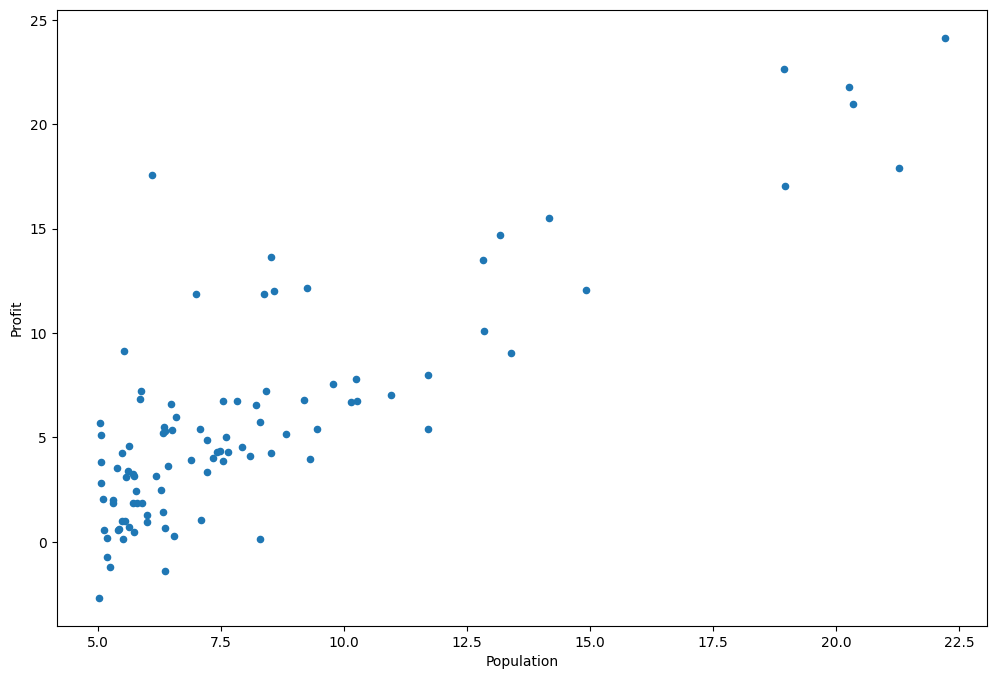

In [106]:
#visualizing the dataset using scatter plot to understand the general trend. We can see that there is a cluster of points in small cities with less profit. There is an increase in profit with increasing population later.
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [73]:
#getting the dataset ready for linear regreesion model
# append a ones column to the front of the data set to get a constant value which acts as the intercept value
data.insert(0, 'ones', 1)
# set X (training data) and y (target variable)
cols = data.shape[1]  #number of columns is assigned to variable cols
X = data.iloc[:,0:cols-1]  #predictor or training variables, all except the target (last) column
y = data.iloc[:,cols-1:cols] #target (last) column

In [77]:
#convert data frames into numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
#initialize a theta (parameter) matrix from a numpy array of two elements (0,0). Theta matrix will be of shape [1,2] with initial parameter values 0
theta = np.matrix(np.array([0,0]))

In [90]:
#checking the shape of the objects for further operations
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [85]:
#create a computeCost function to compute the cost function
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)  #matrix multiplication of elements of X with the transpose of theta
    return np.sum(inner) / (2 * len(X))  #sum of inner squared errors/2m

In [86]:
#initial cost
computeCost(X, y, theta)

32.072733877455676

In [97]:
# create a gradient descent function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))  #initializes a matrix with the same shape as theta to update the values of theta
    parameters = int(theta.ravel().shape[1])  #flatten the theta matrix and gets the number of columns to get the number of parameters
    cost = np.zeros(iters)  #initializes an array with iters number of elements to store the cost values after each iteration

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #updating the term matrix

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [108]:
# perform gradient descent to "fit" the model parameters
alpha = 0.01
iters = 1500

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [123]:
#how good the regression model is, look at the total error using gradient descent
computeCost(X, y, g)

4.483388256587726

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

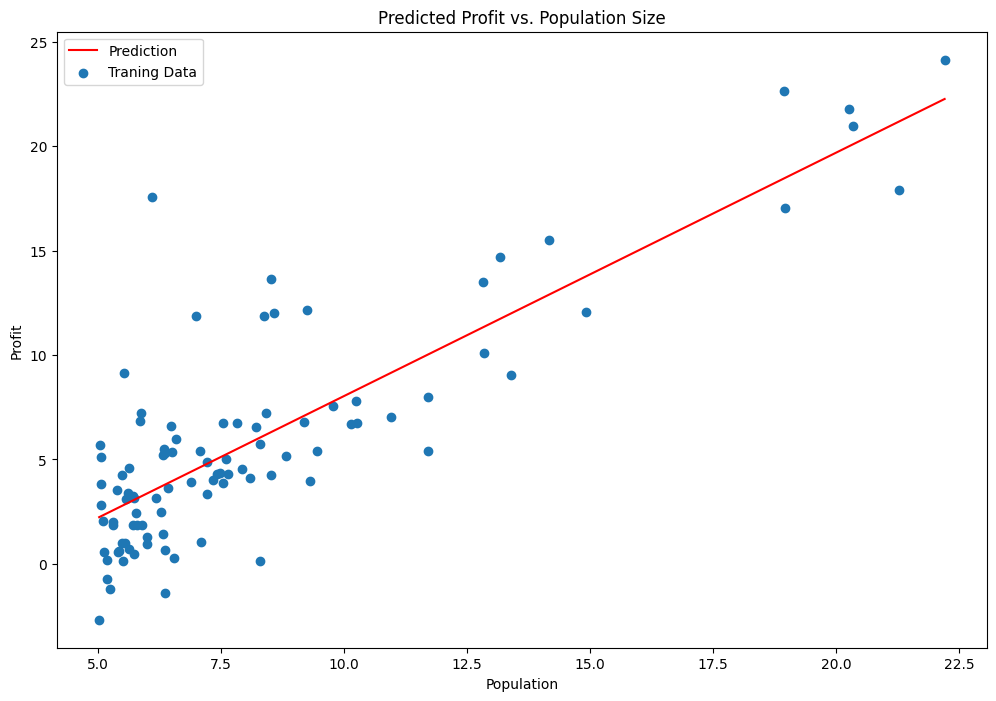

In [95]:
#plot to determine the expected profit
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

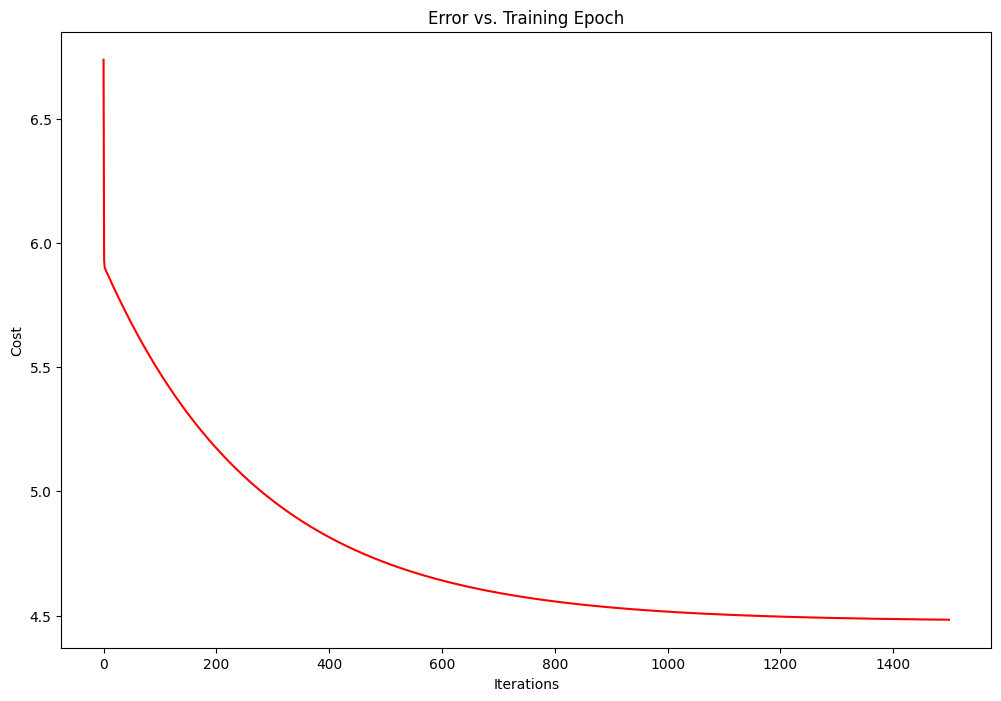

In [96]:
# cost (error) is plotted against iterations to visualize a trend. The cost is decreasing with increasing number of iterations which shows that the gradient descent was calculated properly
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')